## Importing the libraries


In [ ]:

import pandas as pd
import numpy as np

import seaborn as sns
import pandas_profiling #for EDA
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_context('notebook') # optimises picture for notebook viewing
blue = sns.color_palette('Blues')[-1] 

## Importing the dataset

In [ ]:

data=pd.read_csv("C://Users//r.gupta//Desktop//Datasets//Machine-Learning-with-R-datasets-master//concrete.csv")

### Looking at the top5 observarions 

In [40]:

data.head(5)

cement   slag  ash  water  superplastic  coarseagg  fineagg  age  strength
0   540.0    0.0  0.0  162.0           2.5     1040.0    676.0   28     79.99
1   540.0    0.0  0.0  162.0           2.5     1055.0    676.0   28     61.89
2   332.5  142.5  0.0  228.0           0.0      932.0    594.0  270     40.27
3   332.5  142.5  0.0  228.0           0.0      932.0    594.0  365     41.05
4   198.6  132.4  0.0  192.0           0.0      978.4    825.5  360     44.30

### Shape and Variable Names

In [41]:
print(data.shape)

print(data.columns)


# Although it is not a big datset, but the idea is to understand the process and then applying the same principles on big datasets

(1030, 9)
Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')


### Descripitive Statistics

In [42]:
data.describe()

cement         slag          ash        water  superplastic  \
count  1030.000000  1030.000000  1030.000000  1030.000000   1030.000000   
mean    281.167864    73.895825    54.188350   181.567282      6.204660   
std     104.506364    86.279342    63.997004    21.354219      5.973841   
min     102.000000     0.000000     0.000000   121.800000      0.000000   
25%     192.375000     0.000000     0.000000   164.900000      0.000000   
50%     272.900000    22.000000     0.000000   185.000000      6.400000   
75%     350.000000   142.950000   118.300000   192.000000     10.200000   
max     540.000000   359.400000   200.100000   247.000000     32.200000   

         coarseagg      fineagg          age     strength  
count  1030.000000  1030.000000  1030.000000  1030.000000  
mean    972.918932   773.580485    45.662136    35.817961  
std      77.753954    80.175980    63.169912    16.705742  
min     801.000000   594.000000     1.000000     2.330000  
25%     932.000000   730.950000     7.000000    23.710000  
50%     968.000000   779.500000    28.000000    34.445000  
75%    1029.400000   824.000000    56.000000    46.135000  
max    1145.000000   992.600000   365.000000    82.600000

### Variables with their Data Types

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


### Missing Values

In [44]:
data.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

## Exploratory Data Analysis

## Pandas Profiling

In [71]:
pandas_profiling.ProfileReport(data)

### Regression Plots 

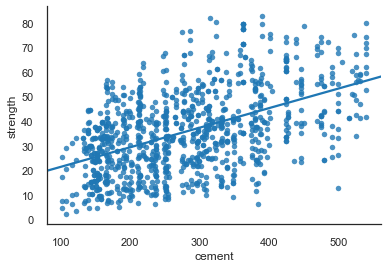

In [72]:
sns.regplot(x="cement", y="strength",data=data, scatter_kws={'s': 30}, ci=None)
sns.despine()
plt.show()

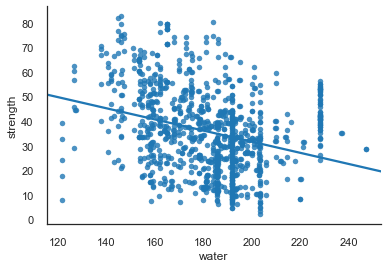

In [73]:
sns.regplot(x="water", y="strength",data=data, scatter_kws={'s': 30}, ci=None)
sns.despine()
plt.show()

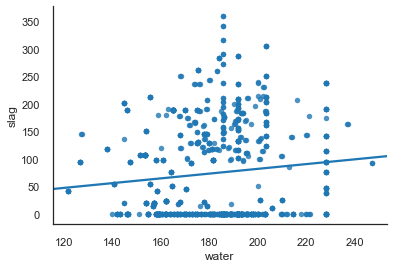

In [74]:
sns.regplot(x="water", y="slag",data=data, scatter_kws={'s': 30}, ci=None)
sns.despine()
plt.show()

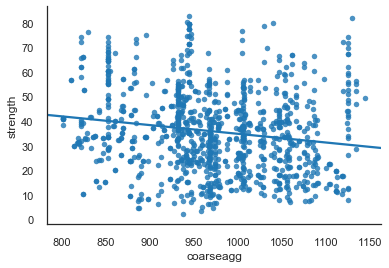

In [75]:
sns.regplot(x="coarseagg", y="strength",data=data, scatter_kws={'s': 30}, ci=None)
sns.despine()
plt.show()

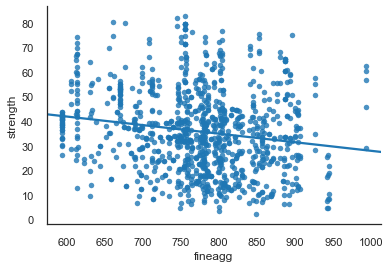

In [76]:
sns.regplot(x="fineagg", y="strength",data=data, scatter_kws={'s': 30}, ci=None)
sns.despine()
plt.show()

In [47]:
data.age.value_counts()

28     425
3      134
7      126
56      91
14      62
90      54
100     52
180     26
91      22
365     14
270     13
360      6
120      3
1        2
Name: age, dtype: int64

 ##### Looking at the value counts we can see that it better to convert age into categorical coloumn 

In [78]:
# Changing age to categorical 



data.age = data.age.astype(str)


#### Looking  at the data types after coverting age and we can see that now it has object data type which means categorical

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null object
strength        1030 non-null float64
dtypes: float64(8), object(1)
memory usage: 72.5+ KB


### One Hot Encoding 

In [80]:
data=pd.get_dummies(data=data)

In [81]:
data.head(3)

cement   slag  ash  water  superplastic  coarseagg  fineagg  strength  \
0   540.0    0.0  0.0  162.0           2.5     1040.0    676.0     79.99   
1   540.0    0.0  0.0  162.0           2.5     1055.0    676.0     61.89   
2   332.5  142.5  0.0  228.0           0.0      932.0    594.0     40.27   

   age_1  age_100  ...  age_180  age_270  age_28  age_3  age_360  age_365  \
0      0        0  ...        0        0       1      0        0        0   
1      0        0  ...        0        0       1      0        0        0   
2      0        0  ...        0        1       0      0        0        0   

   age_56  age_7  age_90  age_91  
0       0      0       0       0  
1       0      0       0       0  
2       0      0       0       0  

[3 rows x 22 columns]